A* Path Length: 118
A* Computational Time: 0.0301 seconds
Enhanced A* Path Length: 118
Enhanced A* Computational Time: 0.0206 seconds


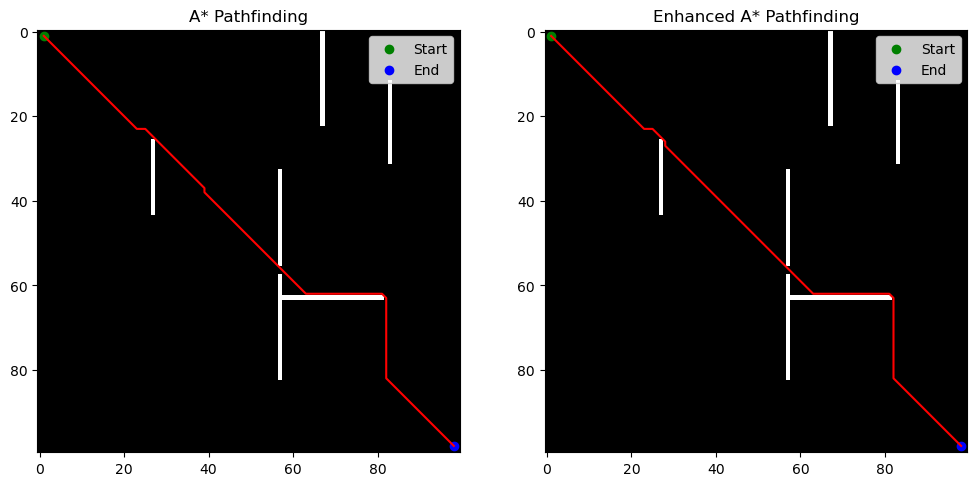

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import heapq
import time
import random

# Helper function: Heuristic
def heuristic(a, b, weight=1):
    """Weighted Manhattan distance with diagonal movement."""
    dx, dy = abs(a[0] - b[0]), abs(a[1] - b[1])
    return weight * (dx + dy) + (1.4 - 2 * weight) * min(dx, dy)

# Enhanced A* Algorithm
def enhanced_a_star_search(grid, start, end, weight=1.2):
    rows, cols = grid.shape
    open_set = []
    heapq.heappush(open_set, (0, start))
    came_from = {}
    g_score = {start: 0}
    f_score = {start: heuristic(start, end, weight)}
    closed_set = set()

    # Precomputed heuristic for the entire grid (for optimization)
    heuristic_map = np.zeros_like(grid, dtype=float)
    for i in range(rows):
        for j in range(cols):
            heuristic_map[i, j] = heuristic((i, j), end, weight)

    while open_set:
        _, current = heapq.heappop(open_set)

        if current in closed_set:
            continue
        closed_set.add(current)

        if current == end:
            path = []
            while current in came_from:
                path.append(current)
                current = came_from[current]
            path.append(start)
            path.reverse()
            return path

        for dx, dy in [
            (0, 1), (1, 0), (0, -1), (-1, 0),  
            (1, 1), (-1, -1), (1, -1), (-1, 1)  
        ]:
            neighbor_pos = (current[0] + dx, current[1] + dy)
            if 0 <= neighbor_pos[0] < rows and 0 <= neighbor_pos[1] < cols:
                if grid[neighbor_pos] == 1 or neighbor_pos in closed_set:
                    continue

                step_cost = 1.4 if abs(dx) + abs(dy) == 2 else 1
                tentative_g_score = g_score[current] + step_cost

                if tentative_g_score < g_score.get(neighbor_pos, float('inf')):
                    came_from[neighbor_pos] = current
                    g_score[neighbor_pos] = tentative_g_score
                    f_score[neighbor_pos] = tentative_g_score + heuristic_map[neighbor_pos]
                    heapq.heappush(open_set, (f_score[neighbor_pos], neighbor_pos))
    return None  

# Original A* Algorithm 
def a_star_search(grid, start, end):
    rows, cols = grid.shape
    open_set = []
    heapq.heappush(open_set, (0, start))
    came_from = {}
    g_score = {start: 0}
    f_score = {start: heuristic(start, end)}

    while open_set:
        _, current = heapq.heappop(open_set)

        if current == end:
            path = []
            while current in came_from:
                path.append(current)
                current = came_from[current]
            path.append(start)
            path.reverse()
            return path

        for dx, dy in [
            (0, 1), (1, 0), (0, -1), (-1, 0),  
            (1, 1), (-1, -1), (1, -1), (-1, 1)  
        ]:
            neighbor_pos = (current[0] + dx, current[1] + dy)
            if 0 <= neighbor_pos[0] < rows and 0 <= neighbor_pos[1] < cols:
                if grid[neighbor_pos] == 1:
                    continue
                step_cost = 1.4 if abs(dx) + abs(dy) == 2 else 1
                tentative_g_score = g_score[current] + step_cost
                if tentative_g_score < g_score.get(neighbor_pos, float('inf')):
                    came_from[neighbor_pos] = current
                    g_score[neighbor_pos] = tentative_g_score
                    f_score[neighbor_pos] = tentative_g_score + heuristic(neighbor_pos, end)
                    heapq.heappush(open_set, (f_score[neighbor_pos], neighbor_pos))
    return None  # No path found

# Grid setup with random obstacles
def build_random_grid(grid_size):
    grid = np.zeros((grid_size, grid_size))
    num_obstacles = random.randint(5, 20)

    for _ in range(num_obstacles):
        start_x = random.randint(0, grid_size - 10)
        start_y = random.randint(0, grid_size - 10)
        length = random.randint(15, 30)
        direction = random.choice(['horizontal', 'vertical'])

        if direction == 'horizontal':
            grid[start_x, start_y:start_y + length] = 1
        else:  # vertical
            grid[start_x:start_x + length, start_y] = 1

    return grid

# Create the grid environment
grid_size = 100
grid = build_random_grid(grid_size)
start = (1, 1)
end = (grid_size - 2, grid_size - 2)
grid[start] = 0
grid[end] = 0

# Measure performance
start_time_a_star = time.time()
path_a_star = a_star_search(grid, start, end)
end_time_a_star = time.time()

start_time_optimized = time.time()
path_enhanced = enhanced_a_star_search(grid, start, end)
end_time_optimized = time.time()

# Results
print(f"A* Path Length: {len(path_a_star) if path_a_star else 'No Path'}")
print(f"A* Computational Time: {end_time_a_star - start_time_a_star:.4f} seconds")
print(f"Enhanced A* Path Length: {len(path_enhanced) if path_enhanced else 'No Path'}")
print(f"Enhanced A* Computational Time: {end_time_optimized - start_time_optimized:.4f} seconds")

# Visualization
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("A* Pathfinding")
plt.imshow(grid, cmap='gray')
if path_a_star:
    px, py = zip(*path_a_star)
    plt.plot(py, px, color='red')
plt.scatter(start[1], start[0], color='green', label='Start')
plt.scatter(end[1], end[0], color='blue', label='End')
plt.legend()

plt.subplot(1, 2, 2)
plt.title("Enhanced A* Pathfinding")
plt.imshow(grid, cmap='gray')
if path_enhanced:
    px, py = zip(*path_enhanced)
    plt.plot(py, px, color='red')
plt.scatter(start[1], start[0], color='green', label='Start')
plt.scatter(end[1], end[0], color='blue', label='End')
plt.legend()

plt.show()


    Test  Grid Size  A* Path Length  A* Time (s)  A* Explored Nodes  \
0      1        259             NaN     0.160230                  0   
1      2        498           658.0     1.334630                658   
2      3        532           473.0     0.248909                473   
3      4        349             NaN     0.651655                  0   
4      5        296             NaN     0.439892                  0   
5      6        457           583.0     1.521772                583   
6      7        636          1061.0     2.611787               1061   
7      8        692           464.0     0.248038                464   
8      9        635           543.0     0.960351                543   
9     10        790          1021.0     3.438497               1021   
10    11        490           401.0     0.339385                401   
11    12        978           881.0     0.114513                881   
12    13        995           765.0     0.558696                765   
13    

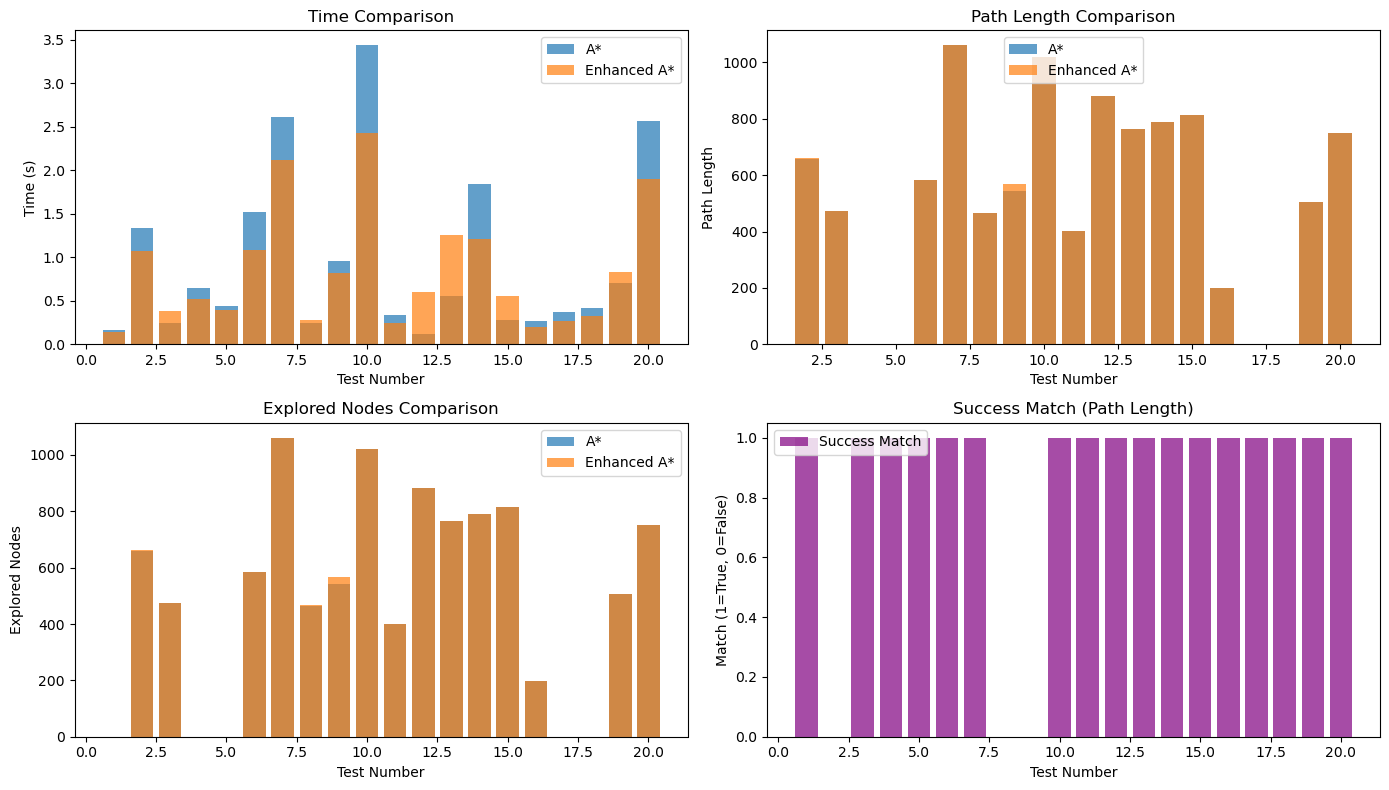

In [41]:
import pandas as pd

# Modified function to use different environments
def build_random_grid(grid_size, max_obstacle_count, max_obstacle_length):
    grid = np.zeros((grid_size, grid_size))
    num_obstacles = random.randint(5, max_obstacle_count)

    for _ in range(num_obstacles):
        start_x = random.randint(0, grid_size - 10)
        start_y = random.randint(0, grid_size - 10)
        length = random.randint(5, max_obstacle_length)
        direction = random.choice(['horizontal', 'vertical'])

        if direction == 'horizontal':
            grid[start_x, start_y:min(start_y + length, grid_size)] = 1
        else:  # vertical
            grid[start_x:min(start_x + length, grid_size), start_y] = 1

    return grid

def performance_test(num_tests=20):
    results = []

    for test in range(1, num_tests + 1):
        grid_size = random.randint(200, 1000)  # Random grid size
        max_obstacle_count = random.randint(50, 200)
        max_obstacle_length = random.randint(100, 300)

        grid = build_random_grid(grid_size, max_obstacle_count, max_obstacle_length)
        start = (random.randint(0, grid_size // 4), random.randint(0, grid_size // 4))
        end = (random.randint(grid_size // 2, grid_size - 1), random.randint(grid_size // 2, grid_size - 1))
        grid[start] = 0
        grid[end] = 0

        # Test A* Algorithm
        start_time = time.time()
        path_a_star = a_star_search(grid, start, end)
        end_time = time.time()
        time_a_star = end_time - start_time
        length_a_star = len(path_a_star) if path_a_star else None
        explored_a_star = len(set(path_a_star)) if path_a_star else 0

        # Test Enhanced A* Algorithm
        start_time = time.time()
        path_enhanced = enhanced_a_star_search(grid, start, end)
        end_time = time.time()
        time_enhanced = end_time - start_time
        length_enhanced = len(path_enhanced) if path_enhanced else None
        explored_enhanced = len(set(path_enhanced)) if path_enhanced else 0

        # Log results
        results.append({
            "Test": test,
            "Grid Size": grid_size,
            "A* Path Length": length_a_star,
            "A* Time (s)": time_a_star,
            "A* Explored Nodes": explored_a_star,
            "Enhanced Path Length": length_enhanced,
            "Enhanced Time (s)": time_enhanced,
            "Enhanced Explored Nodes": explored_enhanced,
            "Success Match": length_a_star == length_enhanced,
        })

    # Convert to DataFrame
    df_results = pd.DataFrame(results)
    return df_results

# Run the performance test
test_results = performance_test(num_tests=20)

# Display the results
print(test_results)

# Visualization of performance
plt.figure(figsize=(14, 8))

# Time comparison
plt.subplot(2, 2, 1)
plt.bar(test_results["Test"], test_results["A* Time (s)"], alpha=0.7, label='A*')
plt.bar(test_results["Test"], test_results["Enhanced Time (s)"], alpha=0.7, label='Enhanced A*')
plt.title('Time Comparison')
plt.xlabel('Test Number')
plt.ylabel('Time (s)')
plt.legend()

# Path length comparison
plt.subplot(2, 2, 2)
plt.bar(test_results["Test"], test_results["A* Path Length"], alpha=0.7, label='A*')
plt.bar(test_results["Test"], test_results["Enhanced Path Length"], alpha=0.7, label='Enhanced A*')
plt.title('Path Length Comparison')
plt.xlabel('Test Number')
plt.ylabel('Path Length')
plt.legend()

# Explored nodes comparison
plt.subplot(2, 2, 3)
plt.bar(test_results["Test"], test_results["A* Explored Nodes"], alpha=0.7, label='A*')
plt.bar(test_results["Test"], test_results["Enhanced Explored Nodes"], alpha=0.7, label='Enhanced A*')
plt.title('Explored Nodes Comparison')
plt.xlabel('Test Number')
plt.ylabel('Explored Nodes')
plt.legend()

# Success match comparison
plt.subplot(2, 2, 4)
plt.bar(test_results["Test"], test_results["Success Match"], alpha=0.7, color='purple', label='Success Match')
plt.title('Success Match (Path Length)')
plt.xlabel('Test Number')
plt.ylabel('Match (1=True, 0=False)')
plt.legend()

plt.tight_layout()
plt.show()
